# __GRIP: THE SPARKS FOUNDATION__

## __Clustering__
### In this section we will see how the Python Scikit-Learn library for machine learning can be used to visualize a basic clustering problem. I have used 2 methods i.e. Elbow method and Silhouette method.

## __Task 2: Prediction using Unsupervised Machine Learning__
### In this clustering task we will predict the optimum number of clusters and represent it visually.

## __Name: Siddharth Mohapatra__

In [23]:
# Importing all libraries/dependencies required in this task
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd
import seaborn as sns
import warnings
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline

In [10]:
# Reading the csv data from the given link
url = "/content/sample_data/Iris.csv"

# Pandas reading the csv file
iris = pd.read_csv(url)

print("Data Imported Successfully.")

Data Imported Successfully.


**Now let's understand the dataset.**

In [24]:
iris.head() # See the first 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
iris.tail() # See the last 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [25]:
# Checking the entire data
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [16]:
# Checking the dimensions in terms of (rows, columns)
iris.shape

(150, 6)

In [17]:
# Checking if there are any missing values in data
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


**So no null or missing values.**

In [19]:
# Checking the descriptive statistics of the data
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [27]:
# To count how many species are there and how many times
iris.value_counts("Species")

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [28]:
# isnull() is to check if there are any missing values or not and sum() is to find all the summation of all missing values 
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**Trying to visualize our data.**

In [29]:
%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

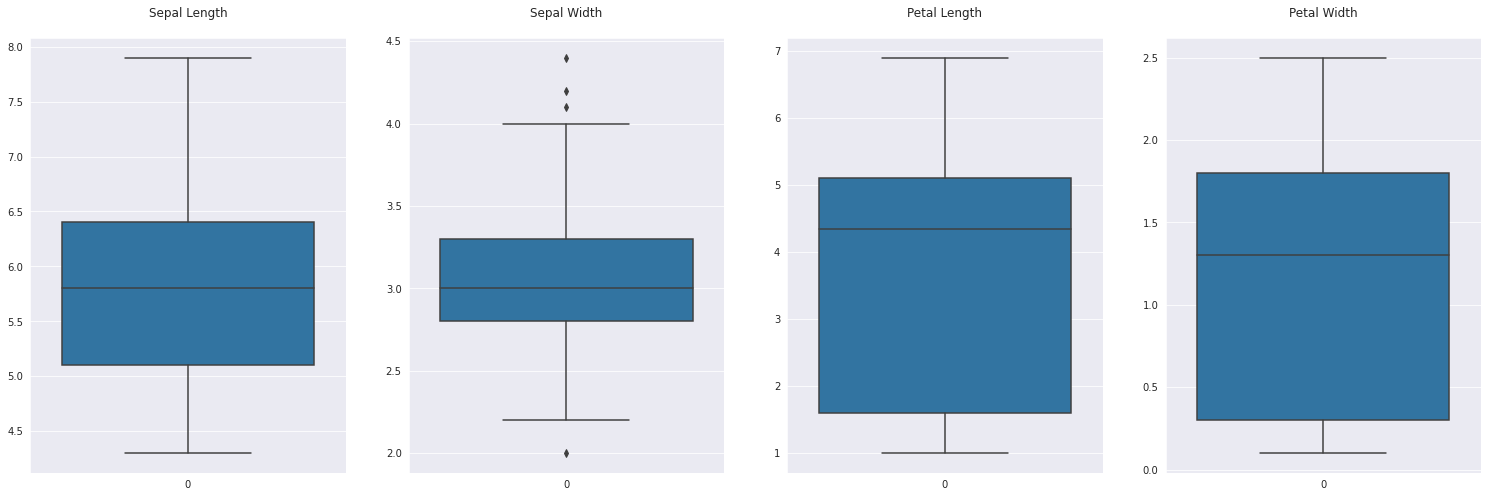

In [31]:
# Drawing a box plot to identify any kind of outlier present in our dataset

plt.figure(figsize=(26,8))

plt.subplot(1,4,1)
sns.boxplot(iris["SepalLengthCm"])
plt.title("Sepal Length\n")

plt.subplot(1,4,2)
sns.boxplot(iris["SepalWidthCm"])
plt.title("Sepal Width\n")

plt.subplot(1,4,3)
sns.boxplot(iris["PetalLengthCm"])
plt.title("Petal Length\n")

plt.subplot(1,4,4)
sns.boxplot(iris["PetalWidthCm"])
plt.title("Petal Width\n")

plt.show()

In [32]:
# Trying to find out if there are any correlation between these variables or features
cols = iris.iloc[:,1:5]
cols.corr(method = 'pearson')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


**We can see the diagonals of the matrix are all 1. And the dataset does not contain any missing values and no outliers as well.**

**Data Visualization**

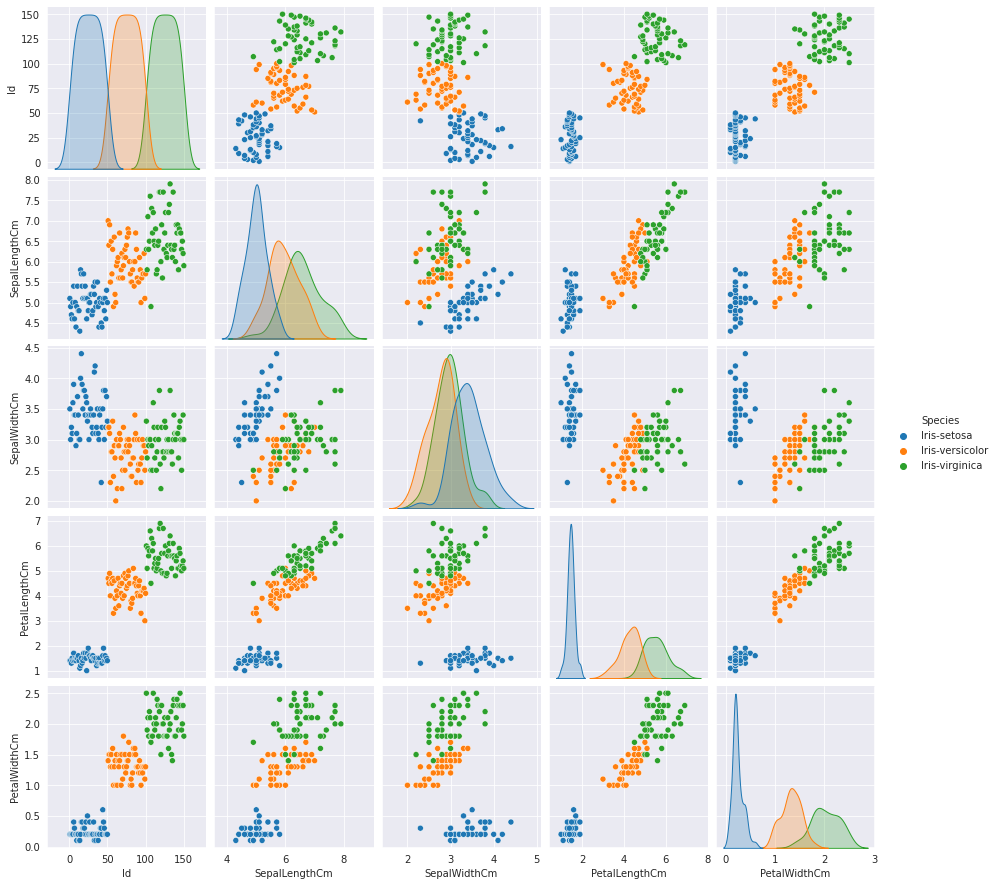

In [34]:
# Kind of Comparison of each attribute and other attribute and then we give hue='Species' to differentiate wrt to Species
sns.pairplot(iris, hue='Species')

**Finding the optimal k-value.**
**1. Elbow method**
**2. Silhoutte analysis**

In [39]:
# Elbow method
iris_new = iris.drop('Species',1)
iris_new.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [40]:
wcss = [] # List to contain the squared distance between the clusters of the point

for i in range(1,6):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 50, n_init = 10, random_state = 0)
  kmeans.fit(iris_new)
  wcss.append(kmeans.inertia_)

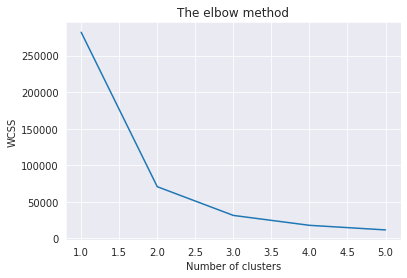

In [41]:
plt.plot(range(1,6), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [43]:
# Silhoutte analysis is used to identify the quality of a cluster
range_n_clusters = [3,4,5]

for num_clusters in range_n_clusters:
  # initialise kmeans
  kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
  kmeans.fit(iris_new)

  cluster_labels = kmeans.labels_

  # silhouette score
  silhouette_avg = silhouette_score(iris_new, cluster_labels)
  print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=3, the silhouette score is 0.5821934246576435
For n_clusters=4, the silhouette score is 0.5563314430969681
For n_clusters=5, the silhouette score is 0.5409379261095422


**For 3 clusters, we can find an optimal clustering of the dataset. This result matches with our visual interpretation and gives agreed upon results.**

**Now let's build the model with these 3 clusters.**

In [44]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(iris_new)

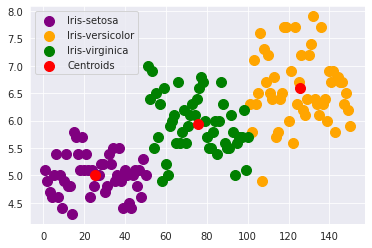

In [46]:
x = iris.iloc[:,[0,1,2,3]].values

# Visualizing the clusters by building the scatterplot
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolor')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

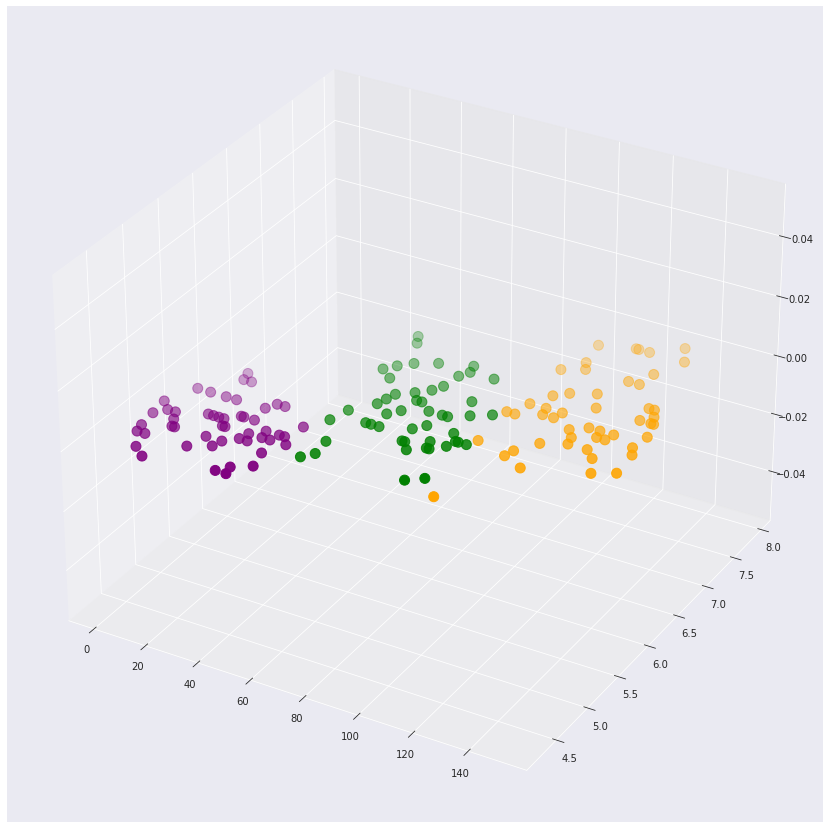

In [61]:
# Now will create a 3D scatterplot using matplotlib
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolor')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

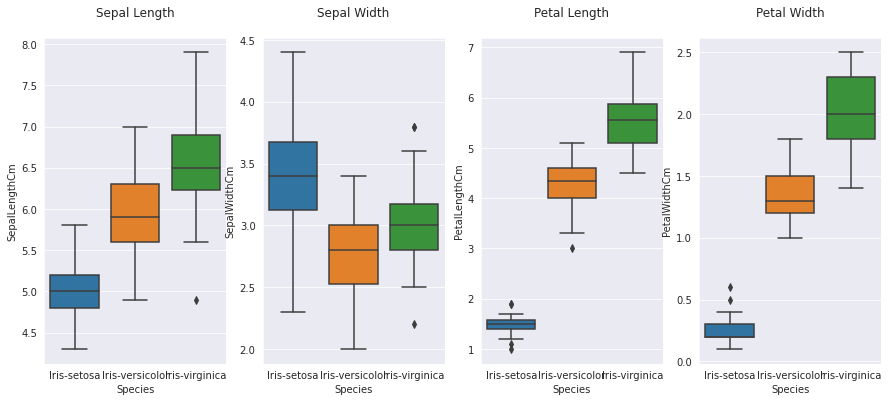

In [62]:
plt.figure(figsize=(15,6))

plt.subplot(1,4,1)
sns.boxplot(y = iris["SepalLengthCm"], x = iris['Species'])
plt.title("Sepal Length\n")

plt.subplot(1,4,2)
sns.boxplot(y = iris["SepalWidthCm"], x = iris['Species'])
plt.title("Sepal Width\n")

plt.subplot(1,4,3)
sns.boxplot(y = iris["PetalLengthCm"], x = iris['Species'])
plt.title("Petal Length\n")

plt.subplot(1,4,4)
sns.boxplot(y = iris["PetalWidthCm"], x = iris['Species'])
plt.title("Petal Width\n")

plt.show()

**Here, this is the representation of 3 classes as we tried to create a boxplot between the attributes and the classes. Like in 1st boxplot we can see that if sepal length is less, it belongs to setosa class, if sepal length is moderate, it belongs to versicolor class and so on...**

## __Conclusion:__
### We could successfully determine that the optimum number of clusters in iris dataset would be. We were able to build an unsupervised model from the dataset. So, our analysis is complete.